In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('data/aggregated_df.csv')
df.columns

Index(['match_id', 'inning', 'bowling_team', 'batter', 'batter_total_balls',
       'batter_SR', 'batter_score', 'dismissal_kind', 'date', 'match_type',
       'venue', 'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced',
       'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced', 'score_last_5', 'balls_last_5',
       'score_last_1', 'balls_last_1', 'score_last_2', 'balls_last_2',
       'score_last_3', 'balls_last_3', 'score_last_4', 'balls_last_4'],
      dtype='object')

In [2]:
df.drop(columns=['batter_total_balls', "batter_SR", "dismissal_kind", "match_id", "date", 'no_of_right_arm_pacers_faced', 'no_of_left_arm_pacers_faced',
       'no_of_right_arm_offspinners_faced', 'no_of_right_arm_legspinners_faced', 'no_of_left_arm_legspinners_faced',
       'no_of_left_arm_offspinners_faced'], inplace=True)

In [3]:
df = df.reindex(columns=[col for col in df.columns if col != 'batter_score'] + ['batter_score'])
df.columns

Index(['inning', 'bowling_team', 'batter', 'match_type', 'venue',
       'score_last_5', 'balls_last_5', 'score_last_1', 'balls_last_1',
       'score_last_2', 'balls_last_2', 'score_last_3', 'balls_last_3',
       'score_last_4', 'balls_last_4', 'batter_score'],
      dtype='object')

In [4]:
player = 'V Kohli'
gdf = df[df['batter'] == player]
gdf.drop(columns=['batter'], inplace=True)

# gdf = gdf.fillna(-1).astype({"no_of_left_arm_offspinners_faced": 'int', "score_last_5": 'int', "balls_last_5": 'int', "score_last_1": 'int', "balls_last_1": 'int', "score_last_2": 'int', "balls_last_2": 'int', "score_last_3": 'int', "balls_last_3": 'int', "score_last_4": 'int', "balls_last_4": 'int'})

#print(gdf.dtypes)

/var/folders/xn/1qlh6svd3jz7qk3ry827bz780000gn/T/ipykernel_57723/69827630.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf.drop(columns=['batter'], inplace=True)


In [5]:
gdf.columns

Index(['inning', 'bowling_team', 'match_type', 'venue', 'score_last_5',
       'balls_last_5', 'score_last_1', 'balls_last_1', 'score_last_2',
       'balls_last_2', 'score_last_3', 'balls_last_3', 'score_last_4',
       'balls_last_4', 'batter_score'],
      dtype='object')

In [6]:
X = gdf.iloc[:, :-1].values
y = gdf.iloc[:, -1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
ct1 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-12])], remainder = 'passthrough')
ct2 = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [-11])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))
X = np.array(ct1.fit_transform(X))
X = np.array(ct2.fit_transform(X))

In [7]:
y = y.reshape(len(y), 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train[:, X_train.shape[1] - 11:] = sc_X.fit_transform(X_train[:, X_train.shape[1] - 11:])
X_test[:, X_train.shape[1] - 11:] = sc_X.transform(X_test[:, X_train.shape[1] - 11:])
y_train = sc_y.fit_transform(y_train)

In [10]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [11]:
def MLR(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [12]:
def DT(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import r2_score
    regressor = DecisionTreeRegressor(random_state = 0)
    regressor.fit(X_train,y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [13]:
def RF(X_train, y_train, X_test, y_test):    
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))
    
    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [14]:
def SVR(X_train, y_train, X_test, y_test):    
    from sklearn.svm import SVR
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt
    regressor = SVR(kernel = 'rbf')
    regressor.fit(X_train, y_train)
    y_pred = sc_y.inverse_transform(regressor.predict(X_test).reshape(-1,1))
    np.set_printoptions(precision=2)
    print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))
    print("r2_score is "+ str(r2_score(y_test, y_pred)))

    # Reshape y_pred and y_test to 1D arrays
    y_pred_1d = y_pred.ravel()
    y_test_1d = y_test.ravel()

    # Create a scatter plot of predicted values vs. actual values
    X = np.linspace(1,len(y_pred_1d) + 1, len(y_pred_1d))
    Y = y_test_1d - y_pred_1d
    plt.bar(X, Y, color = 'red', label = 'Predicted Values')
    plt.xlabel('Test set number')
    plt.ylabel('Actual - Prediction')
    plt.title('Performance')
    plt.show()

In [15]:
MLR(X_train, y_train, X_test, y_test)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

[[54. 21.]
 [27. 21.]
 [ 0.  9.]
 [19. 33.]
 [16. 10.]
 [56.  0.]
 [75. 30.]
 [49. 25.]
 [31.  4.]
 [31.  6.]
 [12. 55.]
 [14. 20.]
 [64. 82.]
 [ 0. 75.]
 [46. 16.]
 [57. 21.]
 [42. 51.]
 [11. 59.]
 [99. 19.]
 [71.  9.]
 [99. 48.]
 [ 3. 67.]
 [ 4. 18.]
 [10. 27.]
 [57. 84.]
 [31. 41.]
 [ 5.  9.]
 [58. 11.]
 [20. 90.]
 [ 7.  0.]
 [50.  3.]
 [ 8.  7.]
 [79. 17.]
 [ 1. 51.]
 [ 0.  9.]
 [18.  1.]
 [13.  0.]
 [58. 16.]
 [ 8.  2.]
 [12.  6.]
 [25.  0.]
 [14. 12.]
 [16. 13.]
 [34. 70.]
 [41. 12.]
 [44. 67.]
 [ 0. 21.]]
r2_score is -0.9684339432358451


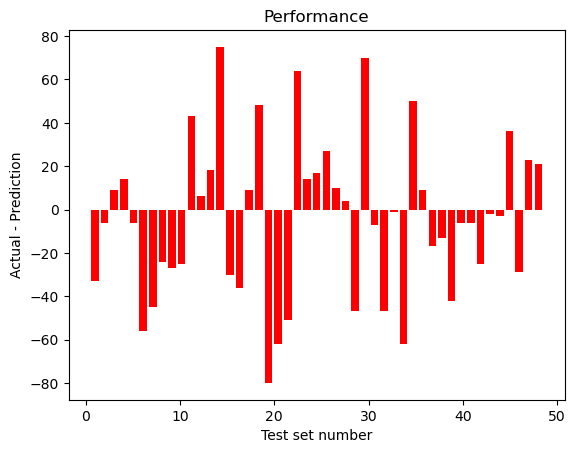

In [16]:
DT(X_train, y_train, X_test, y_test)

[[54.3 21. ]
 [36.5 21. ]
 [25.3  9. ]
 [21.3 33. ]
 [48.4 10. ]
 [66.2  0. ]
 [59.2 30. ]
 [51.1 25. ]
 [19.2  4. ]
 [23.4  6. ]
 [29.6 55. ]
 [63.2 20. ]
 [26.8 82. ]
 [23.8 75. ]
 [28.9 16. ]
 [20.4 21. ]
 [51.8 51. ]
 [21.7 59. ]
 [60.5 19. ]
 [30.6  9. ]
 [79.9 48. ]
 [42.9 67. ]
 [41.1 18. ]
 [20.6 27. ]
 [31.4 84. ]
 [34.2 41. ]
 [20.7  9. ]
 [36.3 11. ]
 [44.3 90. ]
 [32.6  0. ]
 [29.3  3. ]
 [23.9  7. ]
 [65.2 17. ]
 [21.4 51. ]
 [19.   9. ]
 [33.2  1. ]
 [24.   0. ]
 [27.2 16. ]
 [15.6  2. ]
 [29.9  6. ]
 [24.9  0. ]
 [27.5 12. ]
 [41.3 13. ]
 [37.9 70. ]
 [27.7 12. ]
 [15.  67. ]
 [28.  21. ]]
r2_score is -0.38587719623218875


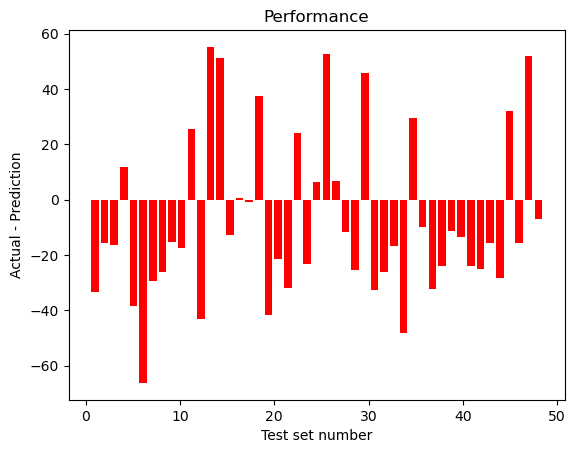

In [17]:
RF(X_train, y_train, X_test, y_test)

In [18]:
SVR(X_train, y_train, X_test, y_test)


ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values